## CISD41 Capstone Project##
by Yongsheng Lin, Jordan Uribe, Aaron Leang, and Ethan Bandong

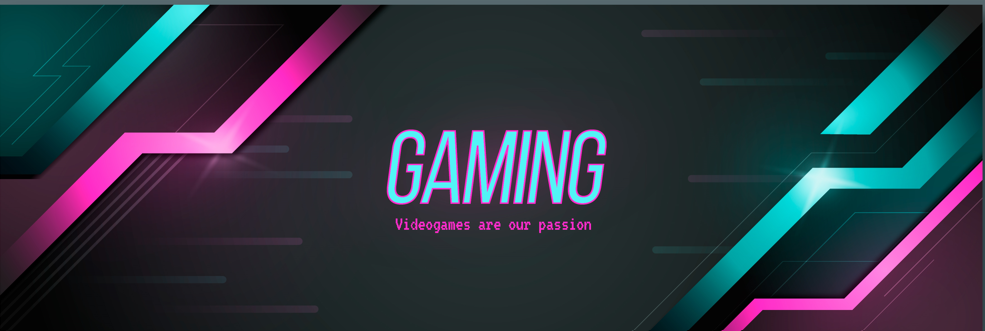

## Introduction ##

We are working with recorded data on video game sales .
This dataset contains a list of video games (Titles, Platforms Publishers, Release year,
Genres) with their sales distribution accross popular regions. It was generated by www.vgchartz.com and the data set could be found at https://www.kaggle.com/datasets/gregorut/videogamesales

## We are going to ask the following questions: ##

**We are going to ask the following questions:**

- Using piviot tables, show the distribution of the top publishers and the generes of games which they published in 1993 aswell as the distribution of the top publishers and the platforms they published to in 2008 -Jordan

- Using Statistical measurements of data what is the distribution of game sales amongst the regions in the year 2007 whose region sales count was more than 100,000 -Jordan

1.What are the percentages of platforms recorded?- Jordan

2.What are the sales trends over time? -Jordan

3.Did the economic crisis in 2007 to 2008 has impact on sales of game industry -Yongsheng

4.What is best selling console as of 2016 by regions? -Yongsheng

5.Do regional differences have an impact on genre popularity in terms of sales?-Yongsheng

6.How do sales compare across different regions? Place Region in rows and Sum of Sales in values.- Aaron

7.What people like to play? analysis game sales by genre overall/ and by region.-Ethan


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')
#Jordan Uribe

In [2]:
df=pd.read_csv('/content/vgsales.csv',index_col=False)#Jordan Uribe

## Importing and cleaning Data ##

We will load the data ,and clean it

In [3]:
dfvgsales=df.rename(columns={'Name':'Game Title','NA_Sales':'NA Sales (M)','EU_Sales':'EU Sales (M)','JP_Sales':'JP Sales (M)','Other_Sales':'Other Sales (M)','Global_Sales':'Global Sales (M)'})
#Jordan Uribe

In [4]:
dfvgsales

,Rank,Game Title,Platform,Year,Genre,Publisher,NA Sales (M),EU Sales (M),JP Sales (M),Other Sales (M),Global Sales (M)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
dfvgsales.head(200)
#Jordan Uribe

,Rank,Game Title,Platform,Year,Genre,Publisher,NA Sales (M),EU Sales (M),JP Sales (M),Other Sales (M),Global Sales (M)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
195,196,Guitar Hero II,PS2,2006.0,Misc,RedOctane,3.81,0.63,0.00,0.68,5.12
196,197,Resident Evil 5,PS3,2009.0,Action,Capcom,1.96,1.43,1.08,0.65,5.11
197,198,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
198,199,Grand Theft Auto: Vice City Stories,PSP,2006.0,Action,Take-Two Interactive,1.70,2.02,0.16,1.21,5.08


In [6]:
dfvgsales.head() #Top 5 video games as of 2016
#Jordan Uribe

,Rank,Game Title,Platform,Year,Genre,Publisher,NA Sales (M),EU Sales (M),JP Sales (M),Other Sales (M),Global Sales (M)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
dfvgsales.info()
# Take a look of summary of data
#Jordan Uribe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              16598 non-null  int64  
 1   Game Title        16598 non-null  object 
 2   Platform          16598 non-null  object 
 3   Year              16327 non-null  float64
 4   Genre             16598 non-null  object 
 5   Publisher         16540 non-null  object 
 6   NA Sales (M)      16598 non-null  float64
 7   EU Sales (M)      16598 non-null  float64
 8   JP Sales (M)      16598 non-null  float64
 9   Other Sales (M)   16598 non-null  float64
 10  Global Sales (M)  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
missing_values = dfvgsales.isnull().sum()
data_types = dfvgsales.dtypes
missing_values, data_types
#Jordan Uribe

(Rank                  0
 Game Title            0
 Platform              0
 Year                271
 Genre                 0
 Publisher            58
 NA Sales (M)          0
 EU Sales (M)          0
 JP Sales (M)          0
 Other Sales (M)       0
 Global Sales (M)      0
 dtype: int64,
 Rank                  int64
 Game Title           object
 Platform             object
 Year                float64
 Genre                object
 Publisher            object
 NA Sales (M)        float64
 EU Sales (M)        float64
 JP Sales (M)        float64
 Other Sales (M)     float64
 Global Sales (M)    float64
 dtype: object)

In [9]:
# Dropping rows where 'Year' is missing
dfvgsales = dfvgsales.dropna(subset=['Year'])
# Filling missing 'Publisher' values with 'Unknown'
dfvgsales['Publisher'] = dfvgsales['Publisher'].fillna('Unknown')
# Converting 'Year' to integer
dfvgsales['Year'] = dfvgsales['Year'].astype(int)
# Checking the dataset after cleaning
dfvgsales.isnull().sum(), dfvgsales.dtypes
#By Jordan Uribe

dfvgsales

,Rank,Game Title,Platform,Year,Genre,Publisher,NA Sales (M),EU Sales (M),JP Sales (M),Other Sales (M),Global Sales (M)
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [10]:
japansales=dfvgsales.sort_values(by=['JP Sales (M)'],ascending=False).head()
#Jordan Uribe

In [11]:
japansales[['Rank','Game Title','JP Sales (M)']] #top 5 games in Japan
#Jordan Uribe

,Rank,Game Title,JP Sales (M)
4,5,Pokemon Red/Pokemon Blue,10.22
12,13,Pokemon Gold/Pokemon Silver,7.20
1,2,Super Mario Bros.,6.81
6,7,New Super Mario Bros.,6.50
20,21,Pokemon Diamond/Pokemon Pearl,6.04


In [12]:
NAsales=dfvgsales.sort_values(by=['NA Sales (M)'],ascending=False).head()
#Jordan Uribe

In [13]:
NAsales[['Game Title','NA Sales (M)']] #top 5 games in North America
#Jordan Uribe

,Game Title,NA Sales (M)
0,Wii Sports,41.49
1,Super Mario Bros.,29.08
9,Duck Hunt,26.93
5,Tetris,23.20
2,Mario Kart Wii,15.85


In [14]:
dfvgsales['Publisher'].value_counts().head(10) #Top 10 Publishers
#Jordan Uribe

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [15]:
dfvgsales['Platform'].value_counts().head(10) #Platform sorted by number of games
#Jordan Uribe

DS      2133
PS2     2127
PS3     1304
Wii     1290
X360    1235
PSP     1197
PS      1189
PC       943
GBA      811
XB       803
Name: Platform, dtype: int64

In [16]:
sum(dfvgsales['Platform'].value_counts()) #number of games across platforms
#Jordan Uribe

16327

*We will begin answer our questions*

### **Using pivot tables, show the distribution of the top publishers and the generes of games which they published in 1993 aswell as the distribution of the top publishers and the platforms they published to in 2008 -Jordan**

In [17]:
#table that we will be using but first we want to know stuff about the dataset
genre_counts = dfvgsales['Genre'].value_counts()
plat_counts = dfvgsales['Platform'].value_counts()

year_counts = dfvgsales['Year'].value_counts()
pub_counts = dfvgsales['Publisher'].value_counts()
print(genre_counts,'\n\n')
print(plat_counts,'\n\n')
print(year_counts,'\n\n')
print(pub_counts,'\n\n')

Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: Genre, dtype: int64 


DS      2133
PS2     2127
PS3     1304
Wii     1290
X360    1235
PSP     1197
PS      1189
PC       943
GBA      811
XB       803
GC       542
3DS      500
PSV      412
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64 


2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1996     263
1995     21

Exploring publisher and game genres from the year 1993





In [18]:
df1993=dfvgsales[dfvgsales['Year']==1993] #filters data frame y the year 1993, picked because thats when games took off
df1993.head(10)

,Rank,Game Title,Platform,Year,Genre,Publisher,NA Sales (M),EU Sales (M),JP Sales (M),Other Sales (M),Global Sales (M)
57,58,Super Mario All-Stars,SNES,1993,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55
472,473,Star Fox,SNES,1993,Shooter,Nintendo,1.61,0.51,0.80,0.07,2.99
849,851,Super Street Fighter II,SNES,1993,Fighting,Nintendo,0.52,0.16,1.29,0.03,2.00
887,889,Mortal Kombat II,SNES,1993,Fighting,Acclaim Entertainment,1.48,0.39,0.00,0.06,1.93
948,950,Secret of Mana,SNES,1993,Role-Playing,SquareSoft,0.25,0.07,1.49,0.02,1.83
1009,1011,Disney's Aladdin,SNES,1993,Platform,Capcom,0.94,0.34,0.21,0.27,1.75
1010,1012,Kirby's Adventure,NES,1993,Platform,Nintendo,0.79,0.14,0.80,0.02,1.75
1054,1056,Super Puyo Puyo,SNES,1993,Puzzle,Banpresto,0.00,0.00,1.69,0.01,1.70
1261,1263,Sonic CD,SCD,1993,Platform,Sega,1.00,0.36,0.09,0.05,1.50
1325,1327,Dragon Ball Z,SNES,1993,Fighting,Namco Bandai Games,0.00,0.00,1.45,0.00,1.45


In [19]:
df1993=dfvgsales[dfvgsales['Year']==1993][['Publisher','Genre']] #only want publisher and genre
df1993.head(10)

,Publisher,Genre
57,Nintendo,Platform
472,Nintendo,Shooter
849,Nintendo,Fighting
887,Acclaim Entertainment,Fighting
948,SquareSoft,Role-Playing
1009,Capcom,Platform
1010,Nintendo,Platform
1054,Banpresto,Puzzle
1261,Sega,Platform
1325,Namco Bandai Games,Fighting


In [20]:
publishercount = df1993['Publisher'].value_counts() #filter by the value counts of game per publisher
publishercount

Nintendo                        9
Namco Bandai Games              8
Capcom                          7
Sega                            6
Konami Digital Entertainment    3
Hudson Soft                     3
SquareSoft                      2
SNK                             2
Tecmo Koei                      2
Titus                           1
Victor Interactive              1
TOHO                            1
Epoch                           1
Imax                            1
Coconuts Japan                  1
Misawa                          1
T&E Soft                        1
Ocean                           1
Hect                            1
Sammy Corporation               1
Acclaim Entertainment           1
Takara                          1
Laguna                          1
ChunSoft                        1
Enix Corporation                1
Banpresto                       1
Interplay                       1
Name: Publisher, dtype: int64

In [21]:
these=['Nintendo','Namco Bandai Games','Capcom','Sega' ] #got the names to filter out
df1993filtered=df1993[df1993['Publisher'].isin(these)]
df1993filtered

,Publisher,Genre
57,Nintendo,Platform
472,Nintendo,Shooter
849,Nintendo,Fighting
1009,Capcom,Platform
1010,Nintendo,Platform
1261,Sega,Platform
1325,Namco Bandai Games,Fighting
1674,Namco Bandai Games,Fighting
1751,Capcom,Platform
2033,Capcom,Action


In [22]:
pd.pivot_table(df1993filtered, index='Publisher', columns='Genre', aggfunc='size', fill_value=0) #game genre distribution

Genre,Action,Adventure,Fighting,Platform,Puzzle,Racing,Role-Playing,Shooter,Sports,Strategy
Publisher,,,,,,,,,,
Capcom,2,0,1,3,0,0,0,0,1,0
Namco Bandai Games,1,0,5,1,0,0,0,0,1,0
Nintendo,0,0,1,2,2,1,1,1,1,0
Sega,1,1,0,2,0,0,1,0,0,1


Exploring Publisher and platforms/consoles in the year 2008

In [23]:
df2008=dfvgsales[dfvgsales['Year']==2008][['Publisher','Platform']]  #filters data frame by  the year 2008, picked because second most game titles and obama was elected


In [24]:
publishercount2008 = df2008['Publisher'].value_counts() #filter by the value counts of game per publisher
publishercount2008

Electronic Arts                 120
Ubisoft                         112
Activision                       88
Sega                             67
Konami Digital Entertainment     64
                               ... 
Ivolgamus                         1
2D Boy                            1
HMH Interactive                   1
Mamba Games                       1
Russel                            1
Name: Publisher, Length: 165, dtype: int64

In [25]:
these2008=['Electronic Arts','Ubisoft','Activision','Sega'] #got the names to filter out
df2008filtered=df2008[df2008['Publisher'].isin(these2008)]
df2008filtered

,Publisher,Platform
98,Activision,X360
166,Activision,PS3
189,Sega,DS
324,Activision,X360
343,Activision,Wii
...,...,...
16384,Electronic Arts,PC
16444,Activision,PC
16514,Ubisoft,DS
16525,Sega,DS


In [26]:
pd.pivot_table(df2008filtered, index='Publisher', columns='Platform', aggfunc='size', fill_value=0) #game platforms distribution

Platform,DS,PC,PS2,PS3,PSP,Wii,X360,XB
Publisher,,,,,,,,
Activision,17,6,14,13,3,22,13,0
Electronic Arts,18,16,13,21,8,18,25,1
Sega,17,2,9,12,4,13,10,0
Ubisoft,53,7,2,10,4,26,10,0


**Using Statistical measurements of data what is the distribution of game sales amongst the regions in the year 2007 whose region sales count was more than 100,000**

In this portion we will describe the quantitative insights of our data set by calculating:
- Mean
-Median
-Standard deviation
-Precentiles
-Box and whiskers plots



**By Jordan Uribe**


In [27]:
dfvgsales.describe() #overview of mean, std min, etc. but something doesnt look right ;/

,Rank,Year,NA Sales (M),EU Sales (M),JP Sales (M),Other Sales (M),Global Sales (M)
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [28]:
salesdb=dfvgsales[['NA Sales (M)',	'EU Sales (M)',	'JP Sales (M)',	'Other Sales (M)'	,'Global Sales (M)']]*1000000 #new data frame converting

In [29]:
salesdb.describe()

,NA Sales (M),EU Sales (M),JP Sales (M),Other Sales (M),Global Sales (M)
count,1.632700e+04,1.632700e+04,1.632700e+04,1.632700e+04,1.632700e+04
mean,2.654150e+05,1.475544e+05,7.866111e+04,4.832547e+04,5.402315e+05
std,8.215909e+05,5.087657e+05,3.115570e+05,1.898854e+05,1.565732e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+04
50%,8.000000e+04,2.000000e+04,0.000000e+00,1.000000e+04,1.700000e+05
75%,2.400000e+05,1.100000e+05,4.000000e+04,4.000000e+04,4.800000e+05
max,4.149000e+07,2.902000e+07,1.022000e+07,1.057000e+07,8.274000e+07


In [30]:
salesdb=salesdb.astype(int)

In [31]:
years=dfvgsales['Year']

In [32]:
statsdb=pd.concat([years,salesdb],axis=1)

In [33]:
statsdb

,Year,NA Sales (M),EU Sales (M),JP Sales (M),Other Sales (M),Global Sales (M)
0,2006,41490000,29020000,3770000,8460000,82740000
1,1985,29080000,3580000,6810000,770000,40240000
2,2008,15850000,12880000,3790000,3310000,35820000
3,2009,15750000,11010000,3280000,2960000,33000000
4,1996,11270000,8890000,10220000,1000000,31370000
...,...,...,...,...,...,...
16593,2002,10000,0,0,0,10000
16594,2003,10000,0,0,0,10000
16595,2008,0,0,0,0,10000
16596,2010,0,10000,0,0,10000


In [34]:
filtered=statsdb[statsdb['Year']==2007] #filtering using only games with minimum 100000 global sales
filteredna=filtered[filtered['NA Sales (M)']>=100000]['NA Sales (M)'].head(100)
filteredjp=filtered[filtered['JP Sales (M)']>=100000]['JP Sales (M)'].head(100)
filteredeu=filtered[filtered['EU Sales (M)']>=100000]['EU Sales (M)'].head(100)
filteredot=filtered[filtered['Other Sales (M)']>=100000]['Other Sales (M)'].head(100)

In [35]:
##Average sales of all regions
na_mean=np.mean(filteredna)
eu_mean=np.mean(filteredjp)
jp_mean=np.mean(filteredeu)
other_mean=np.mean(filteredot)

print(f'North America game sales average:{na_mean} ')
print(f'Europe game sales average:{eu_mean} ')
print(f'Japan game sales average:{jp_mean} ')
print(f'Un named regions game sales average:{other_mean} ')


North America game sales average:1591899.99 
Europe game sales average:441200.0 
Japan game sales average:1111399.99 
Un named regions game sales average:481700.0 


In [36]:
##Median sales of all regions
na_med=np.median(filteredna)
eu_med=np.median(filteredeu)
jp_med=np.median(filteredjp)
other_med=np.median(filteredot)

print(f'North America game sales median:{na_med} ')
print(f'Europe game sales median:{eu_med} ')
print(f'Japan game sales median:{jp_med} ')
print(f'Un named region game  sales median:{other_med} ')


North America game sales median:1155000.0 
Europe game sales median:875000.0 
Japan game sales median:290000.0 
Un named region game  sales median:315000.0 


In [37]:
##STD sales of all regions
na_std=np.std(filteredna)
eu_std=np.std(filteredeu)
jp_std=np.std(filteredjp)
other_std=np.std(filteredot)

print(f'North America game sales Standard Deviation:{na_std} ')
print(f'Europe game sales Standard Deviation:{eu_std} ')
print(f'Japan game sales Standard Deviation:{jp_std} ')
print(f'Un named region game sales Standard Deviation:{other_std} ')


North America game sales Standard Deviation:1476022.1480851872 
Europe game sales Standard Deviation:961736.9191353786 
Japan game sales Standard Deviation:484258.77379764634 
Un named region game sales Standard Deviation:503611.0701722114 


In [38]:
#percentiles of game sales in all regions (25th 50th 75th)
pt=[25,50,75]

In [39]:
na_pt=np.percentile(filteredna,pt)
eu_pt=np.percentile(filteredeu,pt)
jp_pt=np.percentile(filteredjp,pt)
other_pt=np.percentile(filteredot,pt)

print(f'North America game sales at the 25th, 50th and 75th percentiles:{na_pt} ')
print(f'Europe game sales at the 25th, 50th and 75th percentile:{eu_pt}')
print(f'Japan game sales at the 25th, 50th and 75th percentile:{jp_pt} ')
print(f'Un named region game sales at the 25th, 50th and 75th percentile:{other_pt} ')

North America game sales at the 25th, 50th and 75th percentiles:[ 690000. 1155000. 1902500.] 
Europe game sales at the 25th, 50th and 75th percentile:[ 540000.  875000. 1282500.]
Japan game sales at the 25th, 50th and 75th percentile:[190000. 290000. 510000.] 
Un named region game sales at the 25th, 50th and 75th percentile:[177500. 315000. 497500.] 


In [40]:
filteredna_striped=filteredna.reset_index(drop=True)
filteredeu_striped=filteredeu.reset_index(drop=True)
filteredjp_striped=filteredjp.reset_index(drop=True)
filteredot_striped=filteredot.reset_index(drop=True)

all_filtered=pd.DataFrame({'NA Sales':filteredna_striped,
                           'EU Sales':filteredeu_striped,
                           'JP Sales':filteredjp_striped,
                           'Other Sales':filteredot_striped})
all_filtered

,NA Sales,EU Sales,JP Sales,Other Sales
0,8940000,8029999,3600000,2150000
1,7970000,2830000,130000,1210000
2,6160000,3400000,1200000,760000
3,5910000,2380000,130000,900000
4,4460000,1880000,1980000,700000
...,...,...,...,...
95,620000,250000,190000,140000
96,710000,580000,110000,120000
97,690000,390000,190000,220000
98,390000,330000,190000,100000


In [41]:
all_filtered.describe()


,NA Sales,EU Sales,JP Sales,Other Sales
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,1.591900e+06,1.111400e+06,4.412000e+05,4.817000e+05
std,1.483458e+06,9.665820e+05,4.866984e+05,5.061482e+05
min,2.000000e+05,2.000000e+05,1.000000e+05,1.000000e+05
25%,6.900000e+05,5.400000e+05,1.900000e+05,1.775000e+05
50%,1.155000e+06,8.750000e+05,2.900000e+05,3.150000e+05
75%,1.902500e+06,1.282500e+06,5.100000e+05,4.975000e+05
max,8.940000e+06,8.029999e+06,3.600000e+06,2.930000e+06


**Lets visualize this **

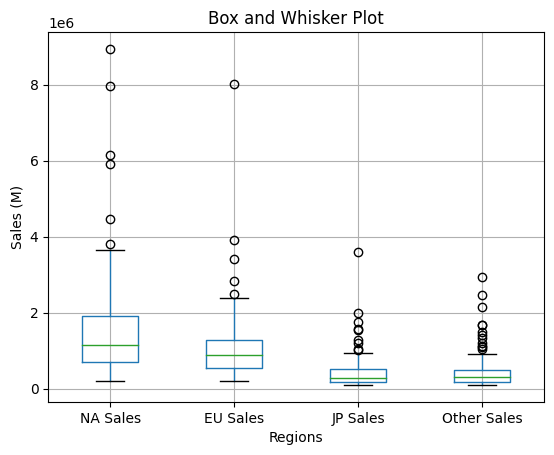

In [42]:
all_filtered.boxplot()
plt.xlabel('Regions')
plt.ylabel('Sales (M)')
plt.title('Box and Whisker Plot')

# Show the plot
plt.show()

Using pairplot to show relationship across the entire dataframe

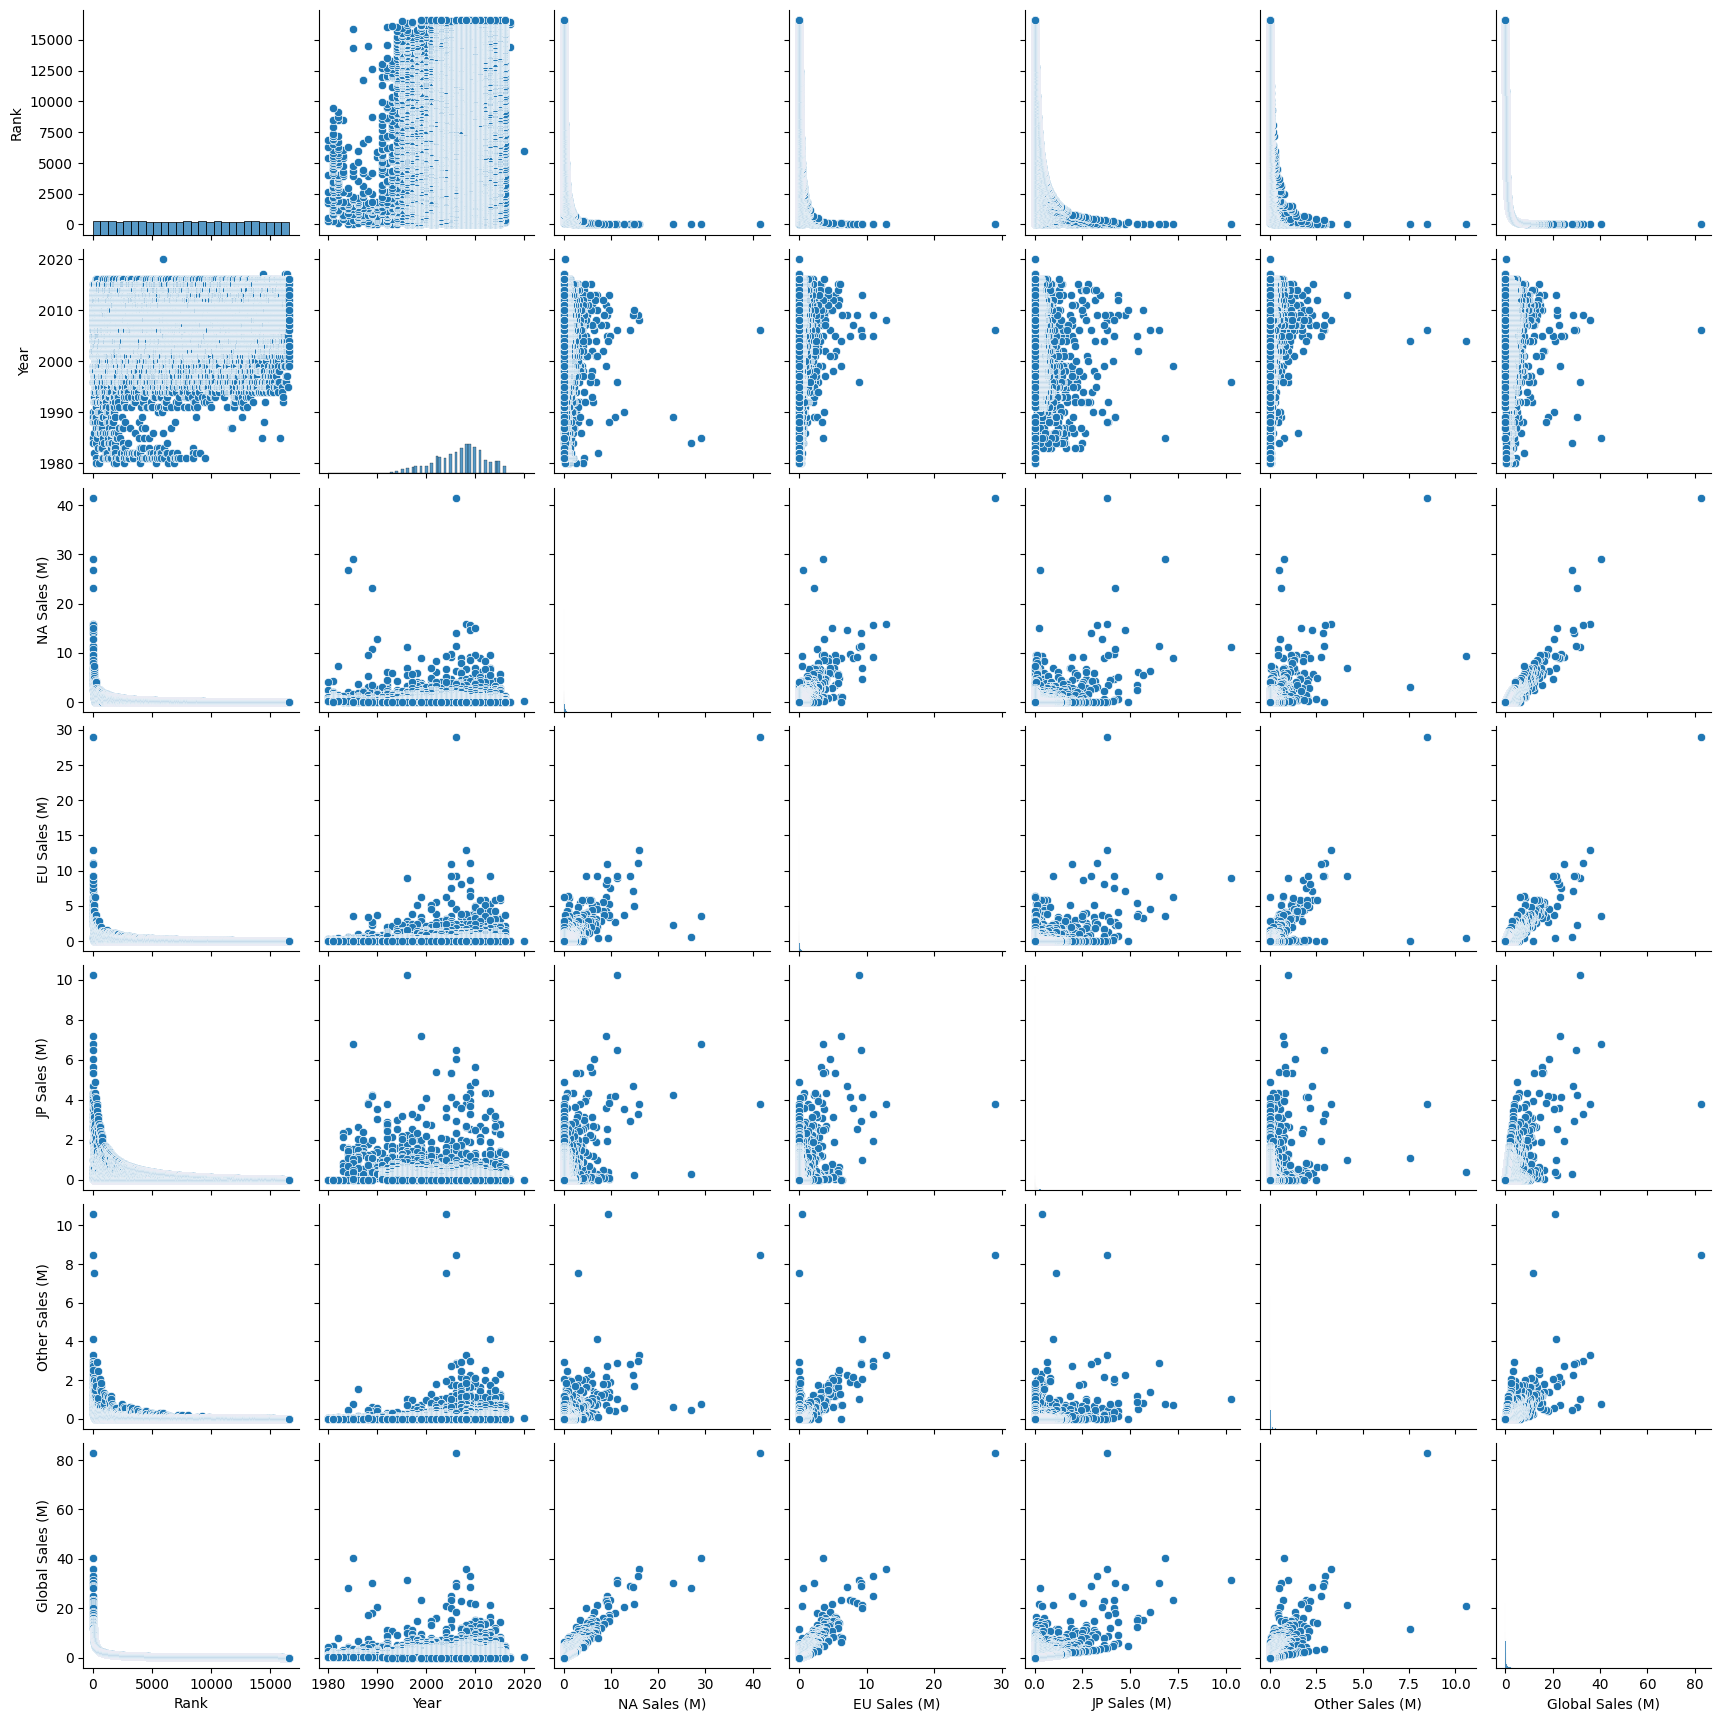

In [43]:
sns.pairplot(dfvgsales)
#Yongsheng

## What are the percentages of platforms recorded? ##

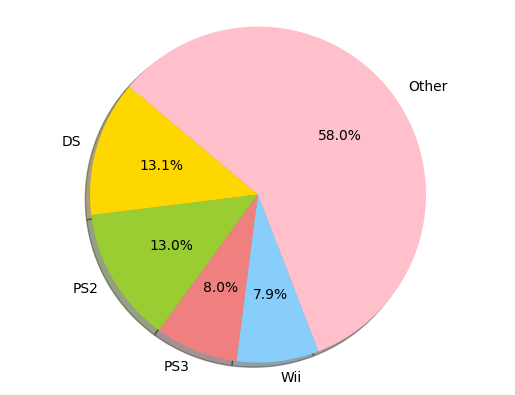

In [44]:
# Data to plot
labels = 'DS', 'PS2', 'PS3', 'Wii','Other'
ds=dfvgsales['Platform'].value_counts().loc['DS']
ps2=dfvgsales['Platform'].value_counts().loc['PS2']
ps3=dfvgsales['Platform'].value_counts().loc['PS3']
wii=dfvgsales['Platform'].value_counts().loc['Wii']
other=(sum(dfvgsales['Platform'].value_counts()))-ds-ps2-ps3-wii

sizes = [ds, ps2, ps3, wii,other]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink']
explode = (0, 0, 0, 0,0)  # explode 1st slice        #IN OUR PRESENTATION WE COULD EXLPLODE SLICES TO EMPHESIZE
#autopct --add the percentage to the slices
#labels specify from where to get the lables

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%'
, shadow=True, startangle=140)

plt.axis('equal')
plt.show()
#Jordan Uribe

## What are the game sales trends over time? ##

In [45]:
sales_trends = dfvgsales.groupby('Year').agg({
    'NA Sales (M)': 'sum',
    'EU Sales (M)': 'sum',
    'JP Sales (M)': 'sum',
    'Other Sales (M)': 'sum',
    'Global Sales (M)': 'sum'
}).reset_index()
sales_trends.tail(10)

,Year,NA Sales (M),EU Sales (M),JP Sales (M),Other Sales (M),Global Sales (M)
29,2009,338.85,191.59,61.89,74.77,667.30
30,2010,304.24,176.73,59.49,59.90,600.45
31,2011,241.06,167.44,53.04,54.39,515.99
32,2012,154.96,118.78,51.74,37.82,363.54
33,2013,154.77,125.80,47.59,39.82,368.11
34,2014,131.97,125.65,39.46,40.02,337.05
35,2015,102.82,97.71,33.72,30.01,264.44
36,2016,22.66,26.76,13.70,7.75,70.93
37,2017,0.00,0.00,0.05,0.00,0.05
38,2020,0.27,0.00,0.00,0.02,0.29


In [46]:
sales_trends.drop(index=[37,38], axis=1, inplace=True)
sales_trends.tail(10)

,Year,NA Sales (M),EU Sales (M),JP Sales (M),Other Sales (M),Global Sales (M)
27,2007,312.05,160.50,60.29,77.60,611.13
28,2008,351.44,184.40,60.26,82.39,678.90
29,2009,338.85,191.59,61.89,74.77,667.30
30,2010,304.24,176.73,59.49,59.90,600.45
31,2011,241.06,167.44,53.04,54.39,515.99
32,2012,154.96,118.78,51.74,37.82,363.54
33,2013,154.77,125.80,47.59,39.82,368.11
34,2014,131.97,125.65,39.46,40.02,337.05
35,2015,102.82,97.71,33.72,30.01,264.44
36,2016,22.66,26.76,13.70,7.75,70.93


<Axes: xlabel='Year', ylabel='value'>

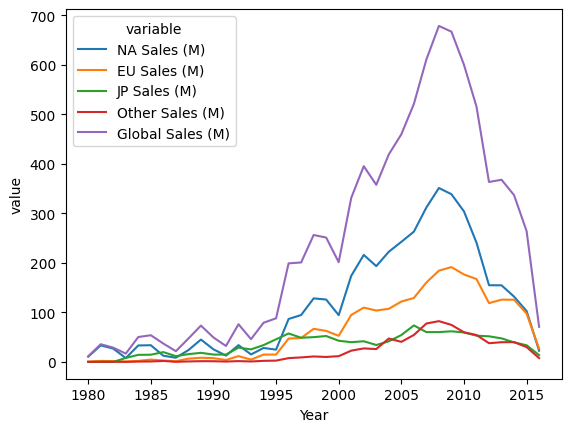

In [47]:
sns.lineplot(x='Year', y='value', hue='variable',
             data=pd.melt(sales_trends, ['Year']))

## Did the economic crisis in 2007 to 2008 has impact on sales of game industry

In [48]:
# Filtering data for the years 2007 to 2010 specific sales trend period
sales_2007 = dfvgsales[dfvgsales['Year'] == 2007]['Global Sales (M)'].sum()
sales_2008 = dfvgsales[dfvgsales['Year'] == 2008]['Global Sales (M)'].sum()
sales_2009 = dfvgsales[dfvgsales['Year'] == 2009]['Global Sales (M)'].sum()
sales_2010 = dfvgsales[dfvgsales['Year'] == 2010]['Global Sales (M)'].sum()

sales_comparison = pd.DataFrame({'Year': ['2007','2008', '2009', '2010'], 'Global Sales': [sales_2007,sales_2008, sales_2009 , sales_2010]})
sales_comparison


,Year,Global Sales
0,2007,611.13
1,2008,678.90
2,2009,667.30
3,2010,600.45


*Add the top publishers for these year to compare. Which big company are making money during these years?*

In [49]:
# Since we want to find out which publishers are leading in sales as of 2016,
# we need to aggregate the sales data by publisher and then sort them.

# Summing up the global sales for each publisher
publisher_sales = dfvgsales.groupby('Publisher')['Global Sales (M)'].sum().sort_values(ascending=False)

top_5_publishers = publisher_sales.head(10)
top_5_publishers = top_5_publishers.head(5).index

# Creating a DataFrame for comparison including the top 5 publishers
sales_comparison = dfvgsales[(dfvgsales['Year'].isin([2007,2008,2009,2010])) & (dfvgsales['Publisher'].isin(top_5_publishers))]
sales_comparison_grouped = sales_comparison.groupby(['Year', 'Publisher'])['Global Sales (M)'].sum().unstack().fillna(0)

sales_comparison_grouped


Publisher,Activision,Electronic Arts,Nintendo,Sony Computer Entertainment,Ubisoft
Year,,,,,
2007,63.57,71.33,104.18,37.54,48.60
2008,67.41,84.12,91.22,26.64,57.44
2009,78.06,86.20,128.89,36.53,47.01
2010,63.39,81.38,61.07,34.89,42.62


<Figure size 800x600 with 0 Axes>

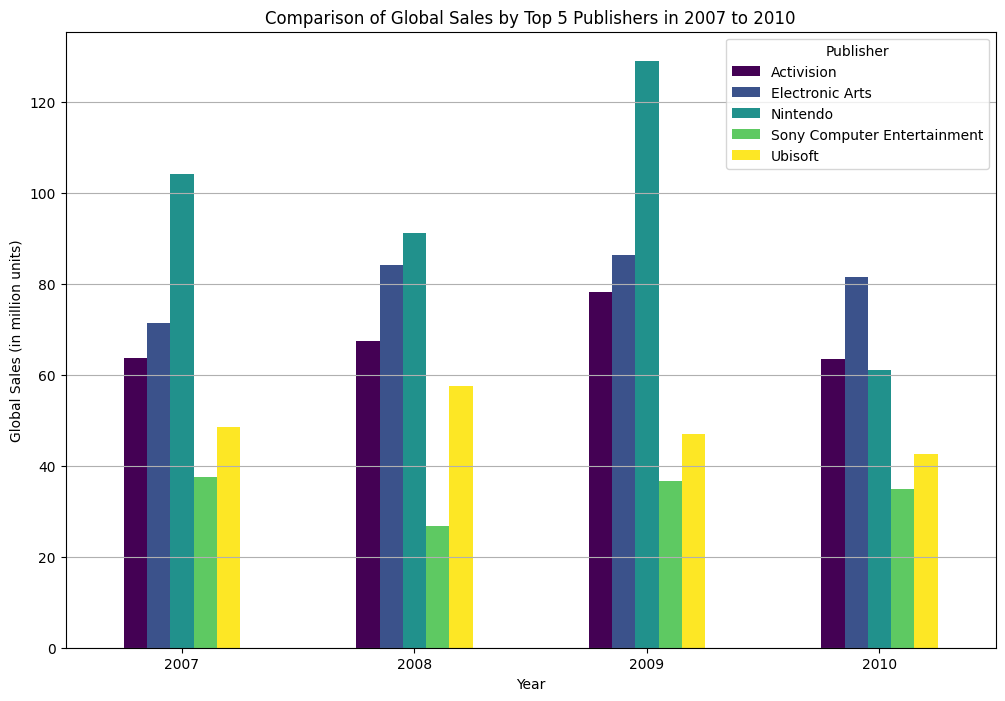

In [50]:
# Plotting the comparison global sales from 2007 to 2010 for the top 5 publishers
plt.figure(figsize=(8, 6))
sales_comparison_grouped.plot(kind='bar', stacked=False, colormap='viridis', figsize=(12,8))
plt.title('Comparison of Global Sales by Top 5 Publishers in 2007 to 2010')
plt.xlabel('Year')
plt.ylabel('Global Sales (in million units)')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

## What is best selling console as of 2016 by regions? ##

In [51]:
vgsales_upto_2016 = dfvgsales[dfvgsales['Year'] <= 2016]
# Filter the entire data up to 2016
platform_sales_by_region = vgsales_upto_2016.groupby('Platform').sum().loc[:, 'NA Sales (M)':'Other Sales (M)']
best_selling_consoles_by_region = platform_sales_by_region.idxmax()
# Group by platform and sum up regional sales (Slice used here)
best_selling_consoles_by_region
#Identify the best selling console in each region by finding the platform with the maximum sales, and print
# BY YONGSHENG LIN

NA Sales (M)       X360
EU Sales (M)        PS3
JP Sales (M)         DS
Other Sales (M)     PS2
dtype: object

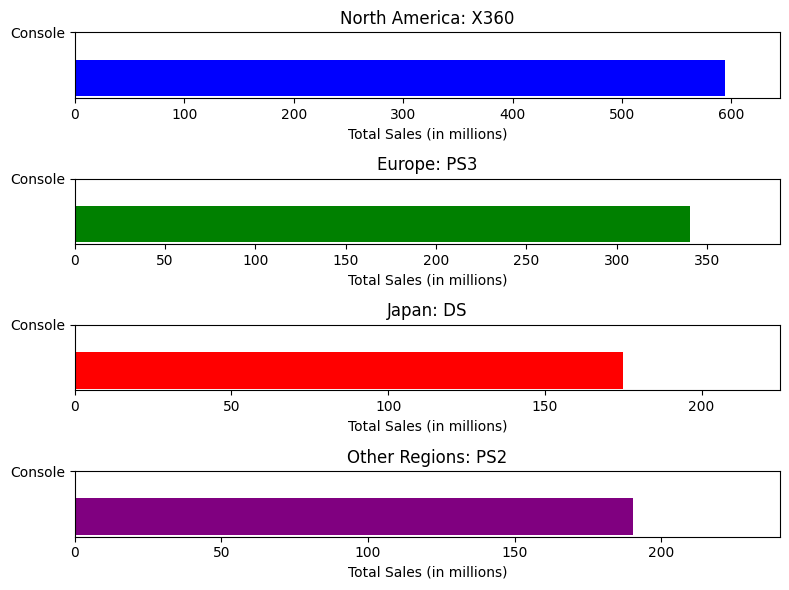

In [52]:
fig, axes = plt.subplots(4, 1, figsize=(8, 6))
colors = ['blue', 'green', 'red', 'purple']
# North America
axes[0].barh('North America',
             platform_sales_by_region.loc[best_selling_consoles_by_region['NA Sales (M)'], 'NA Sales (M)'],
             color=colors[0])
axes[0].set_title(f'North America: {best_selling_consoles_by_region["NA Sales (M)"]}')
axes[0].set_xlim(0, platform_sales_by_region['NA Sales (M)'].max() + 50)

# Europe
axes[1].barh('Europe',
             platform_sales_by_region.loc[best_selling_consoles_by_region['EU Sales (M)'], 'EU Sales (M)'],
             color=colors[1])
axes[1].set_title(f'Europe: {best_selling_consoles_by_region["EU Sales (M)"]}')
axes[1].set_xlim(0, platform_sales_by_region['EU Sales (M)'].max() + 50)

# Japan
axes[2].barh('Japan',
             platform_sales_by_region.loc[best_selling_consoles_by_region['JP Sales (M)'], 'JP Sales (M)'],
             color=colors[2])
axes[2].set_title(f'Japan: {best_selling_consoles_by_region["JP Sales (M)"]}')
axes[2].set_xlim(0, platform_sales_by_region['JP Sales (M)'].max() + 50)

# Other Regions
axes[3].barh('Other Regions',
             platform_sales_by_region.loc[best_selling_consoles_by_region['Other Sales (M)'], 'Other Sales (M)'],
             color=colors[3])
axes[3].set_title(f'Other Regions: {best_selling_consoles_by_region["Other Sales (M)"]}')
axes[3].set_xlim(0, platform_sales_by_region['Other Sales (M)'].max() + 50 )

#Set the labels
for ax in axes:
    ax.set_xlabel('Total Sales (in millions)')
    ax.set_yticks(["Console"])
#Display
plt.tight_layout()
plt.show()

# BY YONGSHENG LIN

Hypothesis Questions:

## Do regional differences have an impact on genre popularity in terms of sales?##

To test the hypothesis that the popularity of certain game genres differs significantly between regions, we can use a chi-square test of independence.
 Let's take look of game genre and region (North America, Europe, Japan, and Other).

In [53]:
# Defining a function to count unique titles per genre in each region
from scipy.stats import chi2_contingency

def count_titles_above_sales_threshold(df, sales_column, threshold=0.1):
    """ Count the number of titles in each genre with sales above a certain threshold in a given region. """
    filtered_df = df[df[sales_column] > threshold]
    return filtered_df.groupby('Genre')['Game Title'].count()

# Applying the function to each region's sales column
na_titles = count_titles_above_sales_threshold(dfvgsales, 'NA Sales (M)')
eu_titles = count_titles_above_sales_threshold(dfvgsales, 'EU Sales (M)')
jp_titles = count_titles_above_sales_threshold(dfvgsales, 'JP Sales (M)')
other_titles = count_titles_above_sales_threshold(dfvgsales, 'Other Sales (M)')

contingency_table = pd.DataFrame({
    'North America': na_titles,
    'Europe': eu_titles,
    'Japan': jp_titles,
    'Other': other_titles
})

chi2, p, dof, expected = chi2_contingency(contingency_table)

contingency_table, (chi2, p)

#Yongsheng

(              North America  Europe  Japan  Other
 Genre                                            
 Action                 1593     979    377    391
 Adventure               238     135    114     29
 Fighting                373     228    199     91
 Misc                    727     385    190    144
 Platform                503     305    165    122
 Puzzle                  185      96     94     24
 Racing                  589     401     77    151
 Role-Playing            489     296    540    114
 Shooter                 686     502     95    230
 Simulation              352     173    116     68
 Sports                 1186     610    307    260
 Strategy                135      93    133     21,
 (1017.2077612938004, 2.308194968804138e-192))

Given the extremely small p-value, we can reject the null hypothesis, which stated that genre popularity is independent of the region. This result suggests that there is a statistically significant association between game genre and region, indicating that the popularity of certain genres does indeed differ significantly between regions.

# How do sales compare across different regions? - Aaron

Data chart showing Video Game Sales by Region.

In [54]:
salesdb #previouly made dataframe

,NA Sales (M),EU Sales (M),JP Sales (M),Other Sales (M),Global Sales (M)
0,41490000,29020000,3770000,8460000,82740000
1,29080000,3580000,6810000,770000,40240000
2,15850000,12880000,3790000,3310000,35820000
3,15750000,11010000,3280000,2960000,33000000
4,11270000,8890000,10220000,1000000,31370000
...,...,...,...,...,...
16593,10000,0,0,0,10000
16594,10000,0,0,0,10000
16595,0,0,0,0,10000
16596,0,10000,0,0,10000


Bar graph showing Video Game Sales by Region

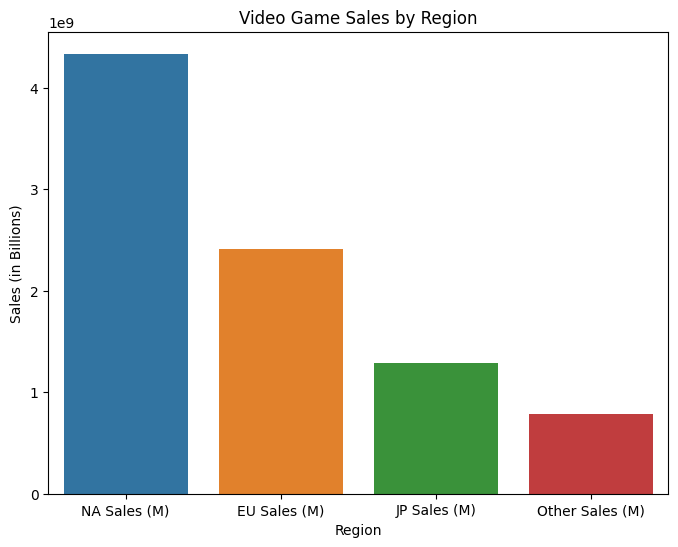

In [55]:
regional_sales=salesdb.drop(columns=['Global Sales (M)']).sum()

# Plotting the regional sales data
plt.figure(figsize=(8, 6))
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title('Video Game Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales (in Billions)')
plt.show()

# Aaron Leang

In [56]:
regional_sales

NA Sales (M)       4333429977
EU Sales (M)       2409119988
JP Sales (M)       1284299997
Other Sales (M)     789009996
dtype: int64

# What people like to play? Game sales by genre overall/and by region - Ethan

In [57]:
vgsalesregion=dfvgsales.groupby('Genre')[['NA Sales (M)','JP Sales (M)','EU Sales (M)','Other Sales (M)']].sum()
vgsalesregion
#Ethan Bandong

,NA Sales (M),JP Sales (M),EU Sales (M),Other Sales (M)
Genre,,,,
Action,861.80,158.66,516.48,184.92
Adventure,102.06,52.01,63.79,16.70
Fighting,220.74,87.15,100.00,36.19
Misc,402.48,106.67,213.82,74.02
Platform,445.99,130.65,200.67,51.51
Puzzle,122.01,56.68,50.53,12.47
Racing,356.93,56.61,236.32,76.68
Role-Playing,326.50,350.29,187.58,59.38
Shooter,575.16,38.18,310.45,101.90


In [58]:
vgsalesregion['NA Sales (M)'].sort_values(ascending=False) #Highest to lowest selling NA genres

Genre
Action          861.80
Sports          670.09
Shooter         575.16
Platform        445.99
Misc            402.48
Racing          356.93
Role-Playing    326.50
Fighting        220.74
Simulation      181.78
Puzzle          122.01
Adventure       102.06
Strategy         67.89
Name: NA Sales (M), dtype: float64

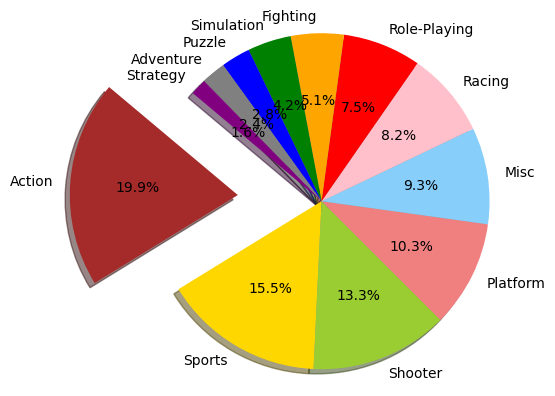

In [59]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Action','Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy'
act=vgsalesregion['NA Sales (M)'][0]

sp=vgsalesregion['NA Sales (M)'][10]
sho=vgsalesregion['NA Sales (M)'][8]
plat=vgsalesregion['NA Sales (M)'][4]
misc=vgsalesregion['NA Sales (M)'][3]
racing=vgsalesregion['NA Sales (M)'][6]
rp=vgsalesregion['NA Sales (M)'][7]
fi=vgsalesregion['NA Sales (M)'][2]
sim=vgsalesregion['NA Sales (M)'][9]
puz=vgsalesregion['NA Sales (M)'][5]
ad=vgsalesregion['NA Sales (M)'][1]
strat=vgsalesregion['NA Sales (M)'][11]

sizes = [act,sp,sho,plat,misc,racing,rp,fi,sim,puz,ad,strat]
colors = ['brown','gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink','red','orange','green','blue','grey','purple']
explode = (.5,0, 0, 0, 0,0,0,0,0,0,0,0)  # explode 1st slice        #IN OUR PRESENTATION WE COULD EXLPLODE SLICES TO EMPHESIZE
#autopct --add the percentage to the slices
#labels specify from where to get the lables

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%'
, shadow=True, startangle=140)

plt.axis('equal')
plt.show()
#Jordan Uribe

In [60]:
vgsalesregion['JP Sales (M)'].sort_values(ascending=False)#Highest to lowest selling JP genres

Genre
Role-Playing    350.29
Action          158.66
Sports          134.76
Platform        130.65
Misc            106.67
Fighting         87.15
Simulation       63.54
Puzzle           56.68
Racing           56.61
Adventure        52.01
Strategy         49.10
Shooter          38.18
Name: JP Sales (M), dtype: float64

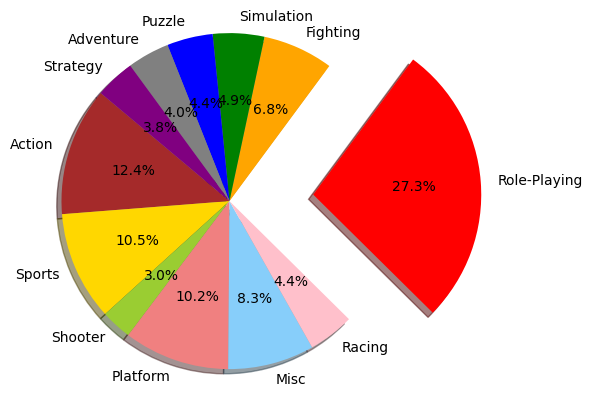

In [61]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Action','Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy'
act=vgsalesregion['JP Sales (M)'][0]

sp=vgsalesregion['JP Sales (M)'][10]
sho=vgsalesregion['JP Sales (M)'][8]
plat=vgsalesregion['JP Sales (M)'][4]
misc=vgsalesregion['JP Sales (M)'][3]
racing=vgsalesregion['JP Sales (M)'][6]
rp=vgsalesregion['JP Sales (M)'][7]
fi=vgsalesregion['JP Sales (M)'][2]
sim=vgsalesregion['JP Sales (M)'][9]
puz=vgsalesregion['JP Sales (M)'][5]
ad=vgsalesregion['JP Sales (M)'][1]
strat=vgsalesregion['JP Sales (M)'][11]

sizes = [act,sp,sho,plat,misc,racing,rp,fi,sim,puz,ad,strat]
colors = ['brown','gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink','red','orange','green','blue','grey','purple']
explode = (0,0, 0, 0, 0,0,0.5,0,0,0,0,0)  # explode 1st slice        #IN OUR PRESENTATION WE COULD EXLPLODE SLICES TO EMPHESIZE
#autopct --add the percentage to the slices
#labels specify from where to get the lables

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%'
, shadow=True, startangle=140)

plt.axis('equal')
plt.show()
#Jordan Uribe

In [62]:
vgsalesregion['EU Sales (M)'].sort_values(ascending=False) #Highest to lowest selling EU genres

Genre
Action          516.48
Sports          371.34
Shooter         310.45
Racing          236.32
Misc            213.82
Platform        200.67
Role-Playing    187.58
Simulation      113.20
Fighting        100.00
Adventure        63.79
Puzzle           50.53
Strategy         44.94
Name: EU Sales (M), dtype: float64

In [63]:
vgsalesregion['EU Sales (M)']

Genre
Action          516.48
Adventure        63.79
Fighting        100.00
Misc            213.82
Platform        200.67
Puzzle           50.53
Racing          236.32
Role-Playing    187.58
Shooter         310.45
Simulation      113.20
Sports          371.34
Strategy         44.94
Name: EU Sales (M), dtype: float64

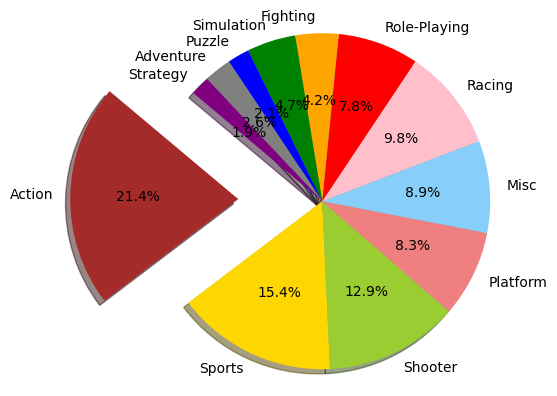

In [64]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Action','Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy'
act=vgsalesregion['EU Sales (M)'][0]

sp=vgsalesregion['EU Sales (M)'][10]
sho=vgsalesregion['EU Sales (M)'][8]
plat=vgsalesregion['EU Sales (M)'][4]
misc=vgsalesregion['EU Sales (M)'][3]
racing=vgsalesregion['EU Sales (M)'][6]
rp=vgsalesregion['EU Sales (M)'][7]
fi=vgsalesregion['EU Sales (M)'][2]
sim=vgsalesregion['EU Sales (M)'][9]
puz=vgsalesregion['EU Sales (M)'][5]
ad=vgsalesregion['EU Sales (M)'][1]
strat=vgsalesregion['EU Sales (M)'][11]

sizes = [act,sp,sho,plat,misc,racing,rp,fi,sim,puz,ad,strat]
colors = ['brown','gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink','red','orange','green','blue','grey','purple']
explode = (.5,0, 0, 0, 0,0,0,0,0,0,0,0)  # explode 1st slice        #IN OUR PRESENTATION WE COULD EXLPLODE SLICES TO EMPHESIZE
#autopct --add the percentage to the slices
#labels specify from where to get the lables

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%'
, shadow=True, startangle=140)

plt.axis('equal')
plt.show()
#Jordan Uribe

In [65]:
vgsalesregion['Other Sales (M)'].sort_values(ascending=False) #Highest to lowest selling  genres in unspecfied regions

Genre
Action          184.92
Sports          132.65
Shooter         101.90
Racing           76.68
Misc             74.02
Role-Playing     59.38
Platform         51.51
Fighting         36.19
Simulation       31.36
Adventure        16.70
Puzzle           12.47
Strategy         11.23
Name: Other Sales (M), dtype: float64

In [67]:
vgsalesregion['Other Sales (M)']

Genre
Action          184.92
Adventure        16.70
Fighting         36.19
Misc             74.02
Platform         51.51
Puzzle           12.47
Racing           76.68
Role-Playing     59.38
Shooter         101.90
Simulation       31.36
Sports          132.65
Strategy         11.23
Name: Other Sales (M), dtype: float64

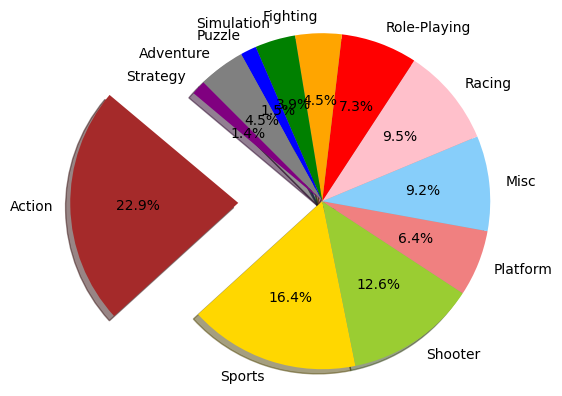

In [70]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Action','Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy'
act=vgsalesregion['Other Sales (M)'][0]

sp=vgsalesregion['Other Sales (M)'][10]
sho=vgsalesregion['Other Sales (M)'][8]
plat=vgsalesregion['Other Sales (M)'][4]
misc=vgsalesregion['Other Sales (M)'][3]
racing=vgsalesregion['Other Sales (M)'][6]
rp=vgsalesregion['Other Sales (M)'][7]
fi=vgsalesregion['Other Sales (M)'][2]
sim=vgsalesregion['Other Sales (M)'][9]
puz=vgsalesregion['Other Sales (M)'][5]
ad=vgsalesregion['Other Sales (M)'][2]
strat=vgsalesregion['Other Sales (M)'][11]

sizes = [act,sp,sho,plat,misc,racing,rp,fi,sim,puz,ad,strat]
colors = ['brown','gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink','red','orange','green','blue','grey','purple']
explode = (.5,0, 0, 0, 0,0,0,0,0,0,0,0)  # explode 1st slice        #IN OUR PRESENTATION WE COULD EXLPLODE SLICES TO EMPHESIZE
#autopct --add the percentage to the slices
#labels specify from where to get the lables

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%'
, shadow=True, startangle=140)

plt.axis('equal')
plt.show()
#Jordan Uribe

#Conclusion

1.What are the percentages of platforms recorded?

The result was surprise that "other" is actually taking big portion of the pie which meaning beside the well known console brand there is still other platform that were doing good at that time.

2.What are the sales trends over time?

The graph shown that game sales increase yearly since 1993 and reach to spike at 2009 and drop back down.

3.Did the economic crisis in 2007 to 2008 has impact on sales of game industry?

This is following up the previous question, further analysis that 2007 to 2009 was peak of game sales globally. Then decrease sharply afterward. This can be some evidence that when economic is bad people like to play game.  

4.What is best selling console as of 2016 by regions?

We can see North America like to play xbox360, Europe like PS3, Japan loves DS, and rest of the world still playing PS2.

5.Do regional differences have an impact on genre popularity in terms of sales?

The result was clear. Giving small p-value, we can reject the null hypothesis, which stated that genre popularity is independent of the region.There is a statistically significant association between game genre and region.

6.How do sales compare across different regions?

Independently North America has the most sales.

7.What people like to play? analysis game sales by genre overall/ and by region?

We have compare regionally about what people like to play in their market?
Results are Most people in North America and Europe like to play action games, Japan like to play RPG, and others likes to play action and sports.